# LIBRARIES

In [1]:
#run only once, 
!pip install ghhops-server flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 4.1 MB/s 
  Created wheel for rhino3dm: filename=rhino3dm-7.14.2-cp37-cp37m-linux_x86_64.whl size=4995202 sha256=ed655d244613b45dff1099e848541f32dfac7cee9df922c11af645887ca56db6
  Stored in directory: /root/.cache/pip/wheels/54/fd/27/c1c91b5631a9dcb2291a8541117b0040fe461756f9c77430fc
Successfully built rhino3dm


In [2]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
from flask import Flask
from flask_ngrok import run_with_ngrok
import ghhops_server as hs
import numpy
import rhino3dm


sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# LOAD/SCALING

In [4]:
# Load data file
#data = pd.read_csv('/content/gdrive/MyDrive/Hops_Colab_Test/data_9500_pots.csv')
#/content/gdrive/MyDrive/AIA_Data_Encoding/v1/data/data_trash/data_1_v3_clean.csv
data = pd.read_csv('/content/gdrive/MyDrive/AIA_Data_Encoding/v1/data/V1_c.csv')
pd.options.display.max_columns = None

data.head()

,area,clean_area,per_clean_area,steps,time,height,width,x_a,x_b,x_c,x_d,y_a,y_b,y_c,y_d,p_a,p_b,p_c,p_d,bin
0,0.810000,0.258896,0.319624,6,1.986396,1.0,1.0,0.000,1.0,1.000,0,0,0.00,1.0,1.00,0.000,0.00,0.000,0.00,1
1,0.785097,0.252604,0.321748,6,1.855302,1.0,1.0,0.008,1.0,0.992,0,0,0.02,1.0,0.98,0.008,0.02,0.008,0.02,1
2,0.760788,0.246393,0.323866,6,1.818197,1.0,1.0,0.016,1.0,0.984,0,0,0.04,1.0,0.96,0.016,0.04,0.016,0.04,1
3,0.737072,0.240276,0.325987,6,1.792320,1.0,1.0,0.024,1.0,0.976,0,0,0.06,1.0,0.94,0.024,0.06,0.024,0.06,1
4,0.713946,0.234263,0.328125,6,1.745758,1.0,1.0,0.032,1.0,0.968,0,0,0.08,1.0,0.92,0.032,0.08,0.032,0.08,1


In [5]:
#declare features (ROBOTIC PARAMETERS)
#x = data.iloc[:,:7]

x = data[['steps', 'height', 'width']]

# Load and instantiate a StandardScalar 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to the inputs
X_scaled = scalerX.fit_transform(x)

print(X_scaled.shape)

x.head()

(5000, 3)


,steps,height,width
0,6,1.0,1.0
1,6,1.0,1.0
2,6,1.0,1.0
3,6,1.0,1.0
4,6,1.0,1.0


In [6]:
#declare regression target - (VESSEL POINTS)

#y = data.iloc[:,4:]
y = data[["time"]]


# Load and instantiate a StandardScalar 
from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()

# Apply the scaler to the outputs
y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)

y.head()

(5000, 1)


,time
0,1.986396
1,1.855302
2,1.818197
3,1.792320
4,1.745758


# TRAINING

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 20)

8


In [8]:
import tensorflow as tf

# Instantiate a sequential model
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  
print(n_cols)
# model architecture
model.add(tf.keras.layers.Dense(2, input_shape=(n_cols,), activation='sigmoid'))# INPUT LAYER

model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))

#model.add(tf.keras.layers.Dense(4, activation='relu'))
#model.add(tf.keras.layers.Dense(4, activation='relu'))
#model.add(tf.keras.layers.Dense(4, activation='relu'))
#model.add(tf.keras.layers.Dense(2, activation='relu'))
#model.add(tf.keras.layers.Dense(2, activation='relu'))
#model.add(tf.keras.layers.Dense(2, activation='relu'))
#model.add(tf.keras.layers.Dense(2, activation='relu'))
#model.add(tf.keras.layers.Dense(1, activation='relu'))


 
# Add a dense layer with 1 value output
model.add(tf.keras.layers.Dense(1, activation= "sigmoid")) # OUTPUT LAYER
  
# Compile the model model 
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])

model.summary()

3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 59
Trainable params: 59
Non-trainable pa

In [9]:
X_train.shape

(4000, 3)

In [10]:
y_train.shape

(4000, 1)

In [12]:
history = model.fit(X_train,y_train, epochs=20, batch_size=200, validation_split=0.2)

Epoch 1/20
16/16 [==============================] - 1s 15ms/step - loss: 0.0909 - accuracy: 0.0000e+00 - val_loss: 0.0869 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0854 - accuracy: 0.0000e+00 - val_loss: 0.0811 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.0000e+00 - val_loss: 0.0749 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0727 - accuracy: 0.0000e+00 - val_loss: 0.0681 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0656 - accuracy: 0.0000e+00 - val_loss: 0.0611 - val_accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.0000e+00 - val_loss: 0.0540 - val_accuracy: 0.0000e+00
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0514 - accuracy: 0.0000e+00 - val_los

[DEBUG] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
[DEBUG] findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
[DEBUG] findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
[DEBUG] findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
[DEBUG] findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
[DEBUG] findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) nor

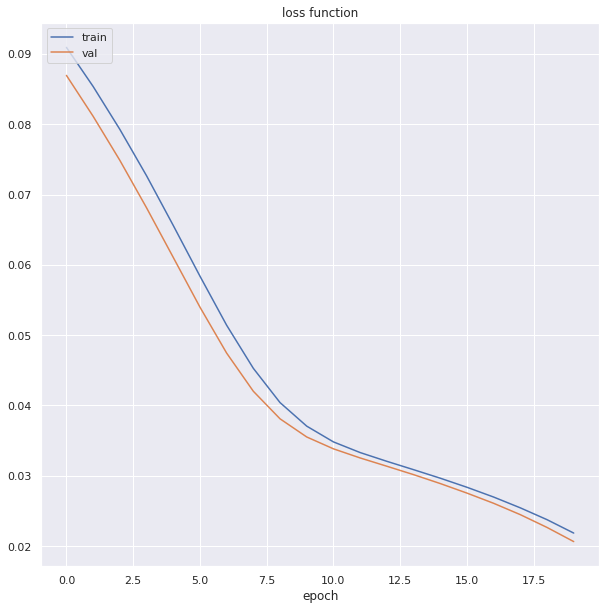

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# MODEL SAVING

In [ ]:
#https://www.tensorflow.org/guide/keras/save_and_serialize
model.save("AtoB_model_20_ep.h5")

scalerX_filename = "scalerXAtoB.save"
joblib.dump(scalerX, scalerX_filename)

scalerY_filename = "scalerYAtoB.save"
joblib.dump(scalerY, scalerY_filename)

['scalerYAtoB.save']

# HOPS

In [ ]:
# 1 --- import model

path = "AtoB_model_20_ep.h5"
model = tf.keras.models.load_model(path)

# 2 --- set up scaler variables

scalerX = joblib.load("scalerXAtoB.save")
scalerY = joblib.load("scalerYAtoB.save")

#area	clean_area	per_clean_area	curve_length	steps	degrees	height	width
#def myMLPredictions(Num_rotation, Rotation_speed, inside_outside, FrictionVal,ForceALoc, ForceBLoc, ForceALen, ForceBLen, ForceARot, ForceBRot):
#area, clean_area, per_clean_area, curve_length, steps, degrees, height, width
def myMLPredictions(steps, height, width):
    # Create Input Array
    new_data = pd.DataFrame([[steps, height, width]])

    # Scale Input to match the same format from the trained model
    scaled_input = scalerX.transform(new_data)

    # Generate Predictions from Scaled Input using model.predict
    #https://www.tensorflow.org/api_docs/python/tf/keras/Model

    # 01// predict
    out = model.predict(scaled_input)
    #02 // inverse scaling
    predictions = scalerY.inverse_transform(out)

    
    #Flatten predictions list to be readable for hops
    pred_list = predictions.tolist()
    flat_list = []

    for i in pred_list:
        flat_list += i

    # Set each prediction value to a variable
    #x_origin, y_origin, x_end,	y_end,	x_center,	y_center
    #x_origin = flat_list[10]
    #y_origin = flat_list[1]
    #x_end = flat_list[2]
    #y_end = flat_list[3]
    #x_center = flat_list[4]
    #y_center = flat_list[5]
    #pt7= flat_list[6]
    #pt8= flat_list[7]
    #pt9= flat_list[8]

    #clean_area = flat_list[0]
    time = flat_list[0]
    #x_end = flat_list[2]
    #y_end = flat_list[3]
    #x_center = flat_list[4]
    #y_center = flat_list[5]
    #x_a = flat_list[6]
    #x_b = flat_list[7]
    #x_c = flat_list[8]
    #x_d = flat_list[9]
    #y_a = flat_list[10]
    #y_b = flat_list[11]
    #y_c = flat_list[12]
    #y_d = flat_list[13]

    #y_origin, x_end, y_end, x_center, y_center

    #x_origin	y_origin	x_end	y_end	x_center	y_center	x_a	x_b	x_c	x_d	y_a	y_b	y_c	y_d

   

    return time



In [ ]:
from ghhops_server.params import HopsNumber
app = Flask(__name__)
#using ngrok library to stream data
run_with_ngrok(app) 
hops = hs.Hops(app)

# -- ATOB MODEL

@hops.component(
    "/myMLWheelAtoB",
    name="Machine Learning Wheel",
    description="Machine Learning Digital Pottery Wheel ",
    inputs=[
        #area, clean_area, per_clean_area, curve_length, steps, degrees, height, width
        #steps,per_clean_area,	height,	width
        #hs.HopsNumber("Num_rotation", "num_rotations", "number of rotations"),
        #hs.HopsNumber("Rotation_speed", "Rotation_speed", "Rotation_speed"),
        #hs.HopsInteger("inside_outside", "inside_outside", "inside_outside"),
        #hs.HopsNumber("FrictionVal", "FrictionVal", "FrictionVal"),
        #hs.HopsNumber("ForceALoc", "ForceALoc", "ForceALoc"),
        #hs.HopsNumber("ForceBLoc", "ForceBLoc", "ForceBLoc"),
        #hs.HopsNumber("ForceALen", "ForceALen", "ForceALen"),
        #hs.HopsNumber("ForceBLen", "ForceBLen", "ForceBLen"),
        #hs.HopsNumber("ForceARot", "ForceARot", "ForceARot"),
        #hs.HopsNumber("ForceBRot", "ForceBRot", "ForceBRot")
        #area	clean_area	per_clean_area	curve_length	steps
        #hs.HopsNumber("area", "area", "area"),
        #hs.HopsNumber("clean_area", "clean_area", "clean_area"),
        #hs.HopsNumber("per_clean_area","per_clean_area", "per_clean_area"),
        #hs.HopsNumber("curve_length", "curve_length", "curve_length"),
        hs.HopsNumber("steps", "steps","steps"),
        #hs.HopsNumber("degrees", "degrees", "degrees"),
        hs.HopsNumber("height","height", "height"),
        hs.HopsNumber("width", "width", "width")   
        
        
    ],
    outputs=[
        #hs.HopsNumber("y_origin", "y_origin", "y_origin"),
        #hs.HopsNumber("x_end", "x_end", "x_end"),
        #hs.HopsNumber("y_end", "y_end", "y_end"),
        #hs.HopsNumber("x_center", "x_center", "x_center"),
        #hs.HopsNumber("y_center", "y_center", "y_center"),
        #hs.HopsNumber("pt7", "pt7", "pt7"),
        #hs.HopsNumber("pt8", "pt8", "pt8"),
        #hs.HopsNumber("pt9", "pt9", "pt9")
        #x_origin, y_origin, x_end, y_end, x_center, y_center, x_a,	x_b,	x_c,	x_d, y_a,	y_b, y_c,	y_d
        #hs.HopsNumber("clean_area", "clean_area", "clean_area"),
        hs.HopsNumber("time", "time", "time"),
        #hs.HopsNumber("y_origin", "y_origin", "y_origin"),
        #hs.HopsNumber("x_end", "x_end", "x_end"),
        #hs.HopsNumber("y_end", "y_end", "y_end"),
        #hs.HopsNumber("x_center", "x_center", "x_center"),
        #hs.HopsNumber("y_center", "y_center", "y_center"),
        #hs.HopsNumber("x_a", "x_a", "x_a"),
        #hs.HopsNumber("x_b", "x_b", "x_b"),
        #hs.HopsNumber("x_c", "x_c", "x_c"),
        #hs.HopsNumber("x_d", "x_d", "x_d"),
        #hs.HopsNumber("y_a", "y_a", "y_a"),
        #hs.HopsNumber("y_b", "y_b", "y_b"),
        #hs.HopsNumber("y_c", "y_c", "y_c"),
        #hs.HopsNumber("y_d","y_d", "y_d")

    ]
)


def myMLFunctionAtoB(steps, height, width):
    return myMLPredictions(steps, height, width)

#steps,	per_clean_area,	height,	width



In [ ]:
#run the app
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


[INFO]  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[DEBUG] Starting new HTTP connection (1): localhost:4040
[DEBUG] http://localhost:4040 "GET /api/tunnels HTTP/1.1" 200 793


 * Running on http://4b74-34-123-147-232.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


[INFO] 127.0.0.1 - - [10/Jun/2022 19:51:03] "GET /myMLWheelAtoB HTTP/1.1" 200 -
[INFO] 127.0.0.1 - - [10/Jun/2022 19:51:03] "GET /myMLWheelAtoB HTTP/1.1" 200 -
[INFO] Solving using legacy API: <HopsComponent /myMLWheelAtoB [steps,height,width -> Machine Learning Wheel -> time] >
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
[INFO] 127.0.0.1 - - [10/Jun/2022 19:52:11] "POST /solve HTTP/1.1" 200 -
[INFO] Solving using legacy API: <HopsComponent /myMLWheelAtoB [steps,height,width -> Machine Learning Wheel -> time] >
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
[INFO] 127.0.0.1 - - [10/Jun/2022 19:52:11] "POST /solve HTTP/1.1" 200 -
[INFO] Solving using legacy API: <HopsComponen